# Aula 1- Validação cruzada (Cross Validation)

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Holdout set
- 2) Validação cruzada
- 3) Leave one out
- 4) Hiperparâmetros (discussão inicial)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

## 0) Estratégia "Holdout set": Conjuntos de treino, validação e teste

Como vimos, no aprendizado de máquina nós temos alguns dados (__conjunto de treino__), e depois fazemos um experimento com uma amostra de dados que nunca vimos (__conjunto de teste__) para saber o quão bem o modelo consegue generalizar.

Assim, temos o erro dentro do conjunto de treino, $E_{in}$, e o erro de generalização, pra dados daquele tipo fora desse conjunto, $E_{out}$. 
<br><br>

<div>
    <img src="images/treino_teste.png" width=500>
</div>

O problema é que, __se usarmos o conjunto de teste de qualquer forma para aprendizado, o erro que obtivermos nele deixa de refletir o erro de generalização__. 

Por exemplo, se treinarmos 3 modelos, e compararmos eles usando o conjunto de teste, o erro no teste não reflete mais o $E_{out}$.

Outro exemplo são certas transformações dos nossos dados. Imagina que pegamos nossos dados, "normalizamos" eles (ou seja, pegamos nossas features e transformamos elas de forma que tenham um range de 0 a 1), e então fazemos a divisão entre conjunto de treino e conjunto de teste. Nesse caso, você já usou o conjunto de teste para "aprender" algo (para normalizar, a gente usa o maior valor da feature na tabela). Logo, sua medida de $E_{out}$ não vale mais. 

O que fazer então? Nós usamos o __conjunto de validação__ (ou _hold-out set_).
<br><br>
<div>
    <img src="images/treino_validacao.png" width=500>
</div>

Com essa separação podemos treinar e validar nosso modelo sem necessitar usar o conjunto de teste e, dessa forma, assumir que o $E_{out}$ se __aproxima de certa forma do erro de generalização__.

<img src="images/cv.png" width=500 text="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb">


Isso foi o que fizemos nas últimas aulas.

Após validar e escolher o modelo, nós podemos juntar os dados de treino, validação e teste em uma única base, e treinarmos o modelo final. Entende-se que os erros do nosso algoritmo só tendem a diminuir, quando fazemos isso.

## 1) Validação cruzada (cross validation)

O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

No extremo desta abordagem, podemos tomar o número $k$ de folds igual ao número de observações na base ($n$). Neste caso, utiliza-se **uma única** observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como **leave one out (LOO)**:

<img src=https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png width=500>

Note que o esforço computacional aumenta conforme $k$ aumenta, sendo máximo quando $k=n$. Por esse motivo, recomenda-se usar o LOO apenas nos casos em que o número de observções na base original é bem pequeno ($\sim 10^2$).

#### Como escolher o valor de k?
- Um __k maior__ significa que cada modelo é treinado em um __conjunto de treinamento maior__ e testado em um conjunto de __validação menor__. Em teoria, isso deve levar a um erro de previsão __(bias) menor__, pois os modelos veem mais dados disponíveis. Porém, um K maior também vai consumir __mais tempo de treino__.

- Um __k menor__ significa que o modelo é treinado em um __conjunto de treinamento menor__ e testado em um conjunto de __validação maior__. Aqui, o potencial para a distribuição de dados na validação diferir do conjunto de treinamento é maior e, portanto, devemos esperar um __erro de previsão mais alto__ em média.

No gráfico abaixo, alguns dados gerados foram divididos em 3 (esquerda) e 10 (direita) folds. Cada linha representa o melhor modelo linear para um fold (ou seja, o modelo que teria o menor erro de previsão ao testar nesse fold). Quando k = 3, uma único fold tem uma distribuição altamente diferente dos outros dois. Isso pode ter um grande impacto no erro de previsão da validação cruzada. Quando k=10, alguns folds também podem diferir muito, mas, em média, o modelo estará mais próximo do modelo que, em geral, reduz mais o erro de previsão:

<img src="images/kfolds.png" text="https://cran.r-project.org/web/packages/cvms/vignettes/picking_the_number_of_folds_for_cross-validation.html" width=700 />

Uma abordagem para responder a essa pergunta é realizar uma análise de sensibilidade para diferentes valores de k. Ou seja, avalie o desempenho do mesmo modelo no mesmo conjunto de dados com diferentes valores de k e veja como eles se comparam (raramente isso é feito).

Em geral, dividimos nosso dataset em 3, 5 ou 10 folds.

Para se aprofundar no tema: https://stats.stackexchange.com/questions/61546/optimal-number-of-folds-in-k-fold-cross-validation-is-leave-one-out-cv-always


### Sklearn

Vamos implementar o procedimento de CV utilizando o sklearn!

No [submódulo model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), temos três ferramentas muito importantes para o processo de CV:

- [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold): classe que cria os folds. Obs.: para fazer o LOO, basta colocar $k=n$ folds, ou então usar diretamente a classe que implementa o [LOO](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut);

- [Stratified K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold): classe que cria os folds de forma estratificada, ou seja, preservando a proporção das classes em cada um dos folds;

- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate): método que recebe os folds e os utiliza para o treinamento e avaliação cruzada de modelos, segundo a métrica definida.

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png text=https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html>
<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png text=https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html>

Para ilustrar o CV,  vamos utilizar os datasets artificiais que o sklearn proporciona:

_______

Vamos começar com um exemplo de **regressão**

In [2]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 500,
                        n_features = 5, n_informative = 3, 
                        noise = 25, tail_strength = 10,
                        random_state = 42)

In [5]:
X_df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])
y_df = pd.Series(y, name="y")

df = pd.concat([X_df, y_df], axis=1)
df

,X1,X2,X3,X4,X5,y
0,-0.109610,0.546284,-0.088363,0.006422,-0.436386,79.870807
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,-115.324859
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,35.552509
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,-145.413703
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,-116.148875
...,...,...,...,...,...,...
495,-1.363174,-1.598124,0.189706,0.462173,2.024310,-87.798391
496,0.239247,-1.979300,2.074083,0.747910,-1.072743,-92.452927
497,2.189803,-0.767348,-0.808298,0.872321,0.183342,20.274546
498,0.615367,0.513106,-0.935439,-0.259547,0.738810,43.199300


In [6]:
df.describe()

,X1,X2,X3,X4,X5,y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.012412,0.047211,0.089335,-0.004983,0.024845,3.420332
std,0.955087,0.969309,0.999397,1.038814,0.949985,110.693405
min,-2.650970,-2.703232,-3.019512,-2.940389,-3.241267,-297.665107
25%,-0.642849,-0.577418,-0.576895,-0.682826,-0.644153,-68.294863
50%,0.033078,0.081273,0.040829,-0.024875,0.008918,4.208483
75%,0.658720,0.668974,0.751524,0.671004,0.635892,76.120529
max,3.078881,3.193108,3.852731,2.558199,3.137749,349.448456


Vamos calcular a correlação entre as variáveis independentes:

In [7]:
df.corr()

,X1,X2,X3,X4,X5,y
X1,1.000000,0.022302,-0.038972,-0.057761,-0.004161,-0.022682
X2,0.022302,1.000000,-0.027835,0.003858,0.060716,0.730179
X3,-0.038972,-0.027835,1.000000,0.039600,0.020429,0.007996
X4,-0.057761,0.003858,0.039600,1.000000,0.008688,0.641558
X5,-0.004161,0.060716,0.020429,0.008688,1.000000,0.155999
y,-0.022682,0.730179,0.007996,0.641558,0.155999,1.000000


<AxesSubplot:>

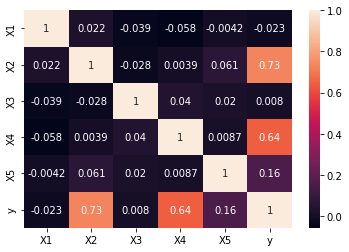

In [9]:
sns.heatmap(df.corr(), annot=True)

Como é o pairplot desses dados?

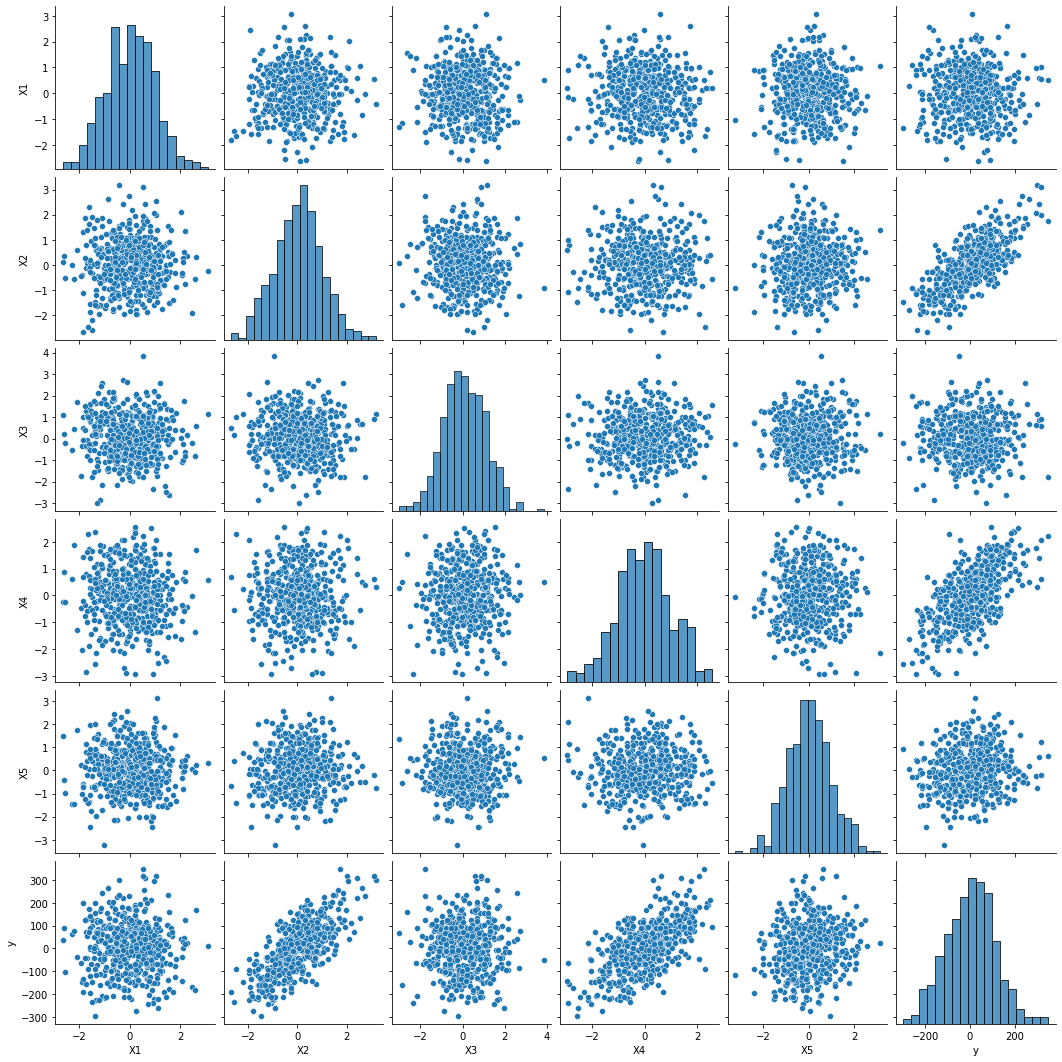

In [10]:
sns.pairplot(df)

Os dados não têm variação de escala tão grande, então não nos preocuparemos em normaliza-los.

**Mas nunca se esqueça que isso é bastante importante quando há grandes diferenças de escala!!**


Agora, implementamos o CV com 5 folds:

In [11]:
from sklearn.model_selection import KFold

In [36]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
vars(kf)

{'n_splits': 5, 'shuffle': True, 'random_state': 42}

In [38]:
type(kf.split(X))

generator

In [39]:
kf.split(X)

<generator object _BaseKFold.split at 0x7fa2ae71a970>

In [40]:
# em cada split, temos uma tupla ([indices de treino], [indices de validação])
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index.shape[0], "TEST:", test_index.shape[0])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(X.shape[0])

TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
500


In [41]:
test_index.shape

(100,)

In [30]:
train_index.shape

(334,)

Como vimos acima, a classe KFold só gera os splits.

Mas, na prática, vamos usar o `cross_validate()`, que tem o KFold como argumento!!!

In [42]:
from sklearn.model_selection import cross_validate

from sklearn.linear_model import ElasticNet

Vamos considerar nesse exemplo a métrica "neg_mean_absolute_error" e retornar o score do treino:

In [45]:
# Instancia o modelo
en = ElasticNet()

# Intancia o Kfold com n_splits=5
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

result_cv = cross_validate(estimator=en, X=df.drop("y", axis=1), y=df['y'], scoring="neg_mean_absolute_error", cv=5, return_train_score=True)

In [46]:
result_cv

{'fit_time': array([0.00230646, 0.00236344, 0.00124454, 0.00126028, 0.00135875]),
 'score_time': array([0.00126982, 0.00094724, 0.00080132, 0.00104308, 0.00089455]),
 'test_score': array([-33.96246114, -35.06840614, -37.23705285, -41.6242596 ,
        -30.01797775]),
 'train_score': array([-34.77946365, -34.30326673, -35.29053374, -35.23522991,
        -34.98714489])}

In [48]:
result_cv = cross_validate(estimator=en, X=df.drop("y", axis=1), y=df['y'], scoring="neg_mean_absolute_error", cv=kf5, return_train_score=True)
result_cv

{'fit_time': array([0.00336123, 0.00188947, 0.00196767, 0.00240016, 0.00230694]),
 'score_time': array([0.00138259, 0.00125289, 0.00121188, 0.00170112, 0.00123477]),
 'test_score': array([-37.24236843, -36.91545126, -33.87016282, -33.95473613,
        -33.5734684 ]),
 'train_score': array([-34.53892092, -34.92024842, -35.32918673, -35.49867268,
        -34.38269734])}

Podemos converter o resultado em dataframe do pandas:

In [50]:
df_result_cv = pd.DataFrame(result_cv)
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.003361,0.001383,-37.242368,-34.538921
1,0.001889,0.001253,-36.915451,-34.920248
2,0.001968,0.001212,-33.870163,-35.329187
3,0.002400,0.001701,-33.954736,-35.498673
4,0.002307,0.001235,-33.573468,-34.382697


In [51]:
# Vamos deixar os valores positivos
df_result_cv = df_result_cv.abs()

Vamos olhar pros resultados mais de perto... O que podemos observar de cada um dos folds?

In [52]:
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.003361,0.001383,37.242368,34.538921
1,0.001889,0.001253,36.915451,34.920248
2,0.001968,0.001212,33.870163,35.329187
3,0.002400,0.001701,33.954736,35.498673
4,0.002307,0.001235,33.573468,34.382697


E na média e desvio padrão, como fica?

In [53]:
df_result_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.002385,0.001357,35.111237,34.933945
std,0.000587,0.000204,1.805506,0.483539
min,0.001889,0.001212,33.573468,34.382697
25%,0.001968,0.001235,33.870163,34.538921
50%,0.002307,0.001253,33.954736,34.920248
75%,0.002400,0.001383,36.915451,35.329187
max,0.003361,0.001701,37.242368,35.498673


Vamos fazer um histplot para o "train_score" e outro para o "test_score"

<AxesSubplot:xlabel='train_score', ylabel='Count'>

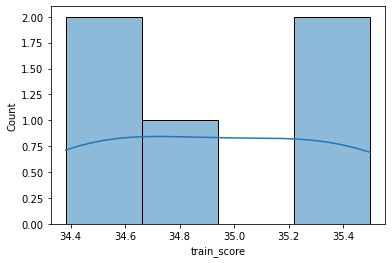

In [55]:
sns.histplot(data=df_result_cv, x='train_score', kde=True)

<AxesSubplot:xlabel='test_score', ylabel='Count'>

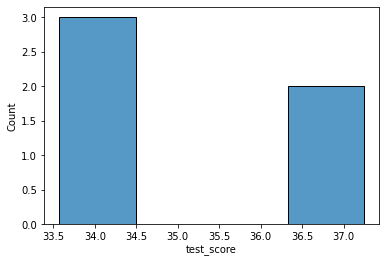

In [56]:
sns.histplot(data=df_result_cv, x="test_score")

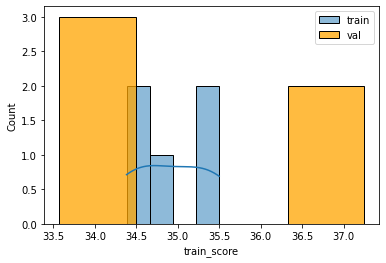

In [60]:
sns.histplot(data=df_result_cv, x='train_score', kde=True, label="train")
sns.histplot(data=df_result_cv, x="test_score", color="orange", label='val')
plt.legend()

Numa única celula:


In [69]:
result_cv

{'fit_time': array([0.00078416, 0.00058722, 0.00066519, 0.00072122, 0.0003581 ]),
 'score_time': array([0.00050545, 0.0004642 , 0.00049782, 0.00041986, 0.00036716]),
 'test_neg_mean_absolute_error': array([-37.24236843, -36.91545126, -33.87016282, -33.95473613,
        -33.5734684 ]),
 'train_neg_mean_absolute_error': array([-34.53892092, -34.92024842, -35.32918673, -35.49867268,
        -34.38269734]),
 'test_neg_root_mean_squared_error': array([-45.67437447, -46.93403744, -42.5833866 , -43.58182851,
        -40.41930158]),
 'train_neg_root_mean_squared_error': array([-43.27676651, -43.28573701, -44.03632367, -43.96646771,
        -43.21766834]),
 'test_r2': array([0.8291165 , 0.83047058, 0.85823266, 0.84565725, 0.837599  ]),
 'train_r2': array([0.84605785, 0.84434473, 0.83947203, 0.83949628, 0.85369806])}

In [70]:
pd.DataFrame(result_cv)


,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_r2,train_r2
0,0.000784,0.000505,-37.242368,-34.538921,-45.674374,-43.276767,0.829117,0.846058
1,0.000587,0.000464,-36.915451,-34.920248,-46.934037,-43.285737,0.830471,0.844345
2,0.000665,0.000498,-33.870163,-35.329187,-42.583387,-44.036324,0.858233,0.839472
3,0.000721,0.000420,-33.954736,-35.498673,-43.581829,-43.966468,0.845657,0.839496
4,0.000358,0.000367,-33.573468,-34.382697,-40.419302,-43.217668,0.837599,0.853698


In [61]:
def plot_cv(estimator, X, y, n_splits, scoring):
    '''
    scoring: string relativa às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    display(df_result_cv[["train_score", "test_score"]].describe())
    
    # ============================
    
    print("\nDistribuição de métricas de treino:")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    plt.show()
    
    print("\nDistribuição de métricas de validação:")
    sns.histplot(data=df_result_cv, x="test_score", kde=True)
    plt.show()
    
    print("\nAs duas juntas (compare a variância!):")
    sns.histplot(data=df_result_cv, x="train_score", kde=True, label="Train")
    sns.histplot(data=df_result_cv, x="test_score", color="orange", kde=True, label="Validation")
    plt.legend()
    plt.show()

,train_score,test_score
count,5.000000,5.000000
mean,34.933945,35.111237
std,0.483539,1.805506
min,34.382697,33.573468
25%,34.538921,33.870163
50%,34.920248,33.954736
75%,35.329187,36.915451
max,35.498673,37.242368



Distribuição de métricas de treino:


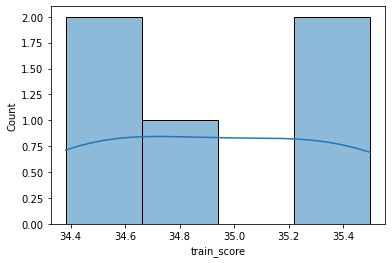


Distribuição de métricas de validação:


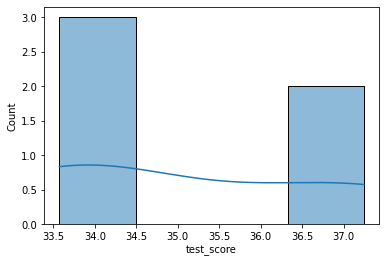


As duas juntas (compare a variância!):


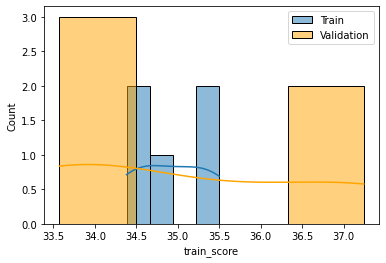

In [62]:
plot_cv(en, X, y, n_splits=5, scoring="neg_mean_absolute_error")

Vamos agora aumentar a quantidade de folds para 30. É esperada alguma mudança?

,train_score,test_score
count,30.000000,30.000000
mean,34.913566,35.118937
std,0.144129,7.124084
min,34.683546,21.635696
25%,34.816336,30.535681
50%,34.885635,35.276464
75%,35.006462,39.876677
max,35.198265,47.729019



Distribuição de métricas de treino:


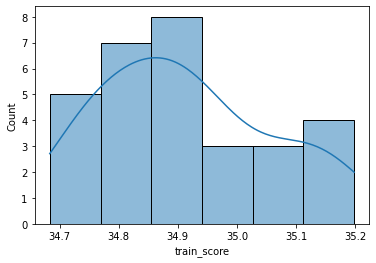


Distribuição de métricas de validação:


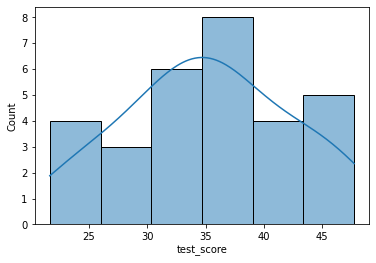


As duas juntas (compare a variância!):


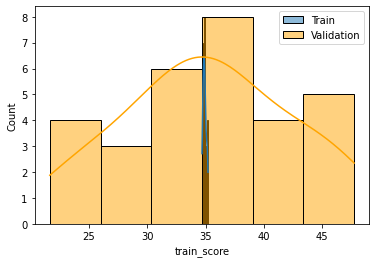

In [63]:
en = ElasticNet()

plot_cv(en, X, y, n_splits=30, scoring="neg_mean_absolute_error")

Comparando com o train-test split direto da forma como fazíamos antes (Hold out):

In [64]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ================================

en = ElasticNet().fit(X_train, y_train)

# ================================

from sklearn.metrics import mean_absolute_error

y_pred_train = en.predict(X_train)
print("\nMétrica de treino:")
print(mean_absolute_error(y_train, y_pred_train))

y_pred_test = en.predict(X_test)
print("\nMétrica de validação:")
print(mean_absolute_error(y_test, y_pred_test))


Métrica de treino:
34.52420837921775

Métrica de validação:
39.05591800744537


______
_____
____

Caso queira usar mais métricas de uma vez... SEM PROBLEMAS :)

In [65]:
n_splits = 5
estimator = ElasticNet()
scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")

kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                           cv=kf5, scoring=scoring,
                           return_train_score=True)

# ============================

df_result_cv = pd.DataFrame(result_cv)
df_result_cv = df_result_cv.abs()

df_result_cv

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_r2,train_r2
0,0.000784,0.000505,37.242368,34.538921,45.674374,43.276767,0.829117,0.846058
1,0.000587,0.000464,36.915451,34.920248,46.934037,43.285737,0.830471,0.844345
2,0.000665,0.000498,33.870163,35.329187,42.583387,44.036324,0.858233,0.839472
3,0.000721,0.000420,33.954736,35.498673,43.581829,43.966468,0.845657,0.839496
4,0.000358,0.000367,33.573468,34.382697,40.419302,43.217668,0.837599,0.853698


_______________

In [66]:
def plot_cv_varias_metricas(estimator, X, y, n_splits, scoring):
    '''
    scoring: tupla de strings relativas às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    colunas_metricas = df_result_cv.columns.tolist()[2:]

    for i in range(0, len(colunas_metricas), 2):

        display(df_result_cv[[colunas_metricas[i+1], colunas_metricas[i]]].describe())

        print(f'\nDistribuição da métrica {colunas_metricas[i+1].replace("train_", "")} de treino:')
        sns.histplot(data=df_result_cv, x=colunas_metricas[i+1], kde=True)
        plt.show()

        print(f'\nDistribuição da métrica {colunas_metricas[i].replace("test_", "")} de validação:')
        sns.histplot(data=df_result_cv, x=colunas_metricas[i], kde=True)
        plt.show()

        print("\nAs duas juntas (compare a variância!):")
        sns.histplot(data=df_result_cv, x=colunas_metricas[i+1], label="treino", kde=True)
        sns.histplot(data=df_result_cv, x=colunas_metricas[i], color="orange", label="validação", kde=True)
        plt.legend()
        plt.show()
        
        print("#"*80)
    

,train_neg_mean_absolute_error,test_neg_mean_absolute_error
count,30.000000,30.000000
mean,34.913566,35.118937
std,0.144129,7.124084
min,34.683546,21.635696
25%,34.816336,30.535681
50%,34.885635,35.276464
75%,35.006462,39.876677
max,35.198265,47.729019



Distribuição da métrica neg_mean_absolute_error de treino:


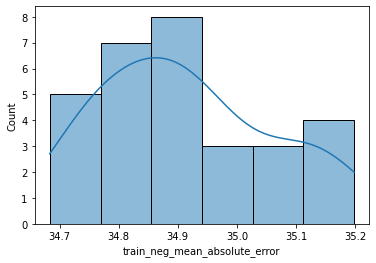


Distribuição da métrica neg_mean_absolute_error de validação:


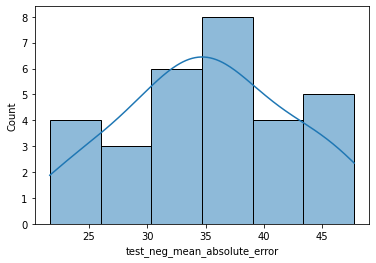


As duas juntas (compare a variância!):


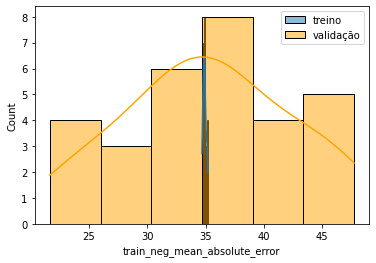

################################################################################


,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
count,30.000000,30.000000
mean,43.561148,43.161349
std,0.134884,7.876156
min,43.302666,27.779693
25%,43.473587,38.337612
50%,43.543192,42.605086
75%,43.634248,48.166132
max,43.839619,60.211813



Distribuição da métrica neg_root_mean_squared_error de treino:


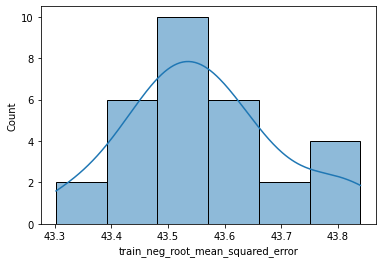


Distribuição da métrica neg_root_mean_squared_error de validação:


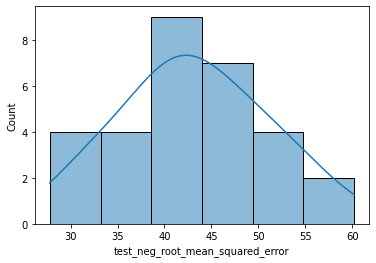


As duas juntas (compare a variância!):


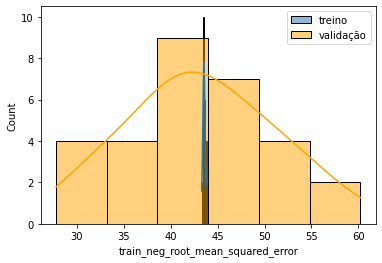

################################################################################


,train_r2,test_r2
count,30.000000,30.000000
mean,0.844783,0.828963
std,0.002616,0.036106
min,0.839848,0.749952
25%,0.842733,0.812329
50%,0.845213,0.826827
75%,0.846661,0.853945
max,0.849561,0.892042



Distribuição da métrica r2 de treino:


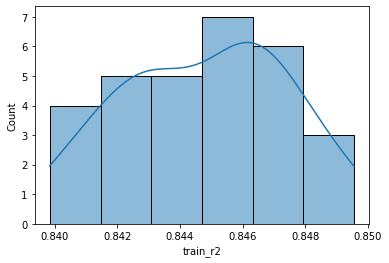


Distribuição da métrica r2 de validação:


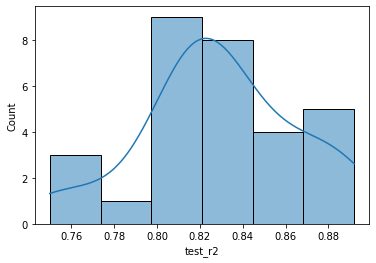


As duas juntas (compare a variância!):


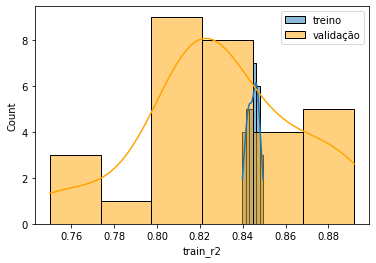

################################################################################


In [67]:
en = ElasticNet()
scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")

plot_cv_varias_metricas(en, X, y, n_splits=30, scoring=scoring)

_____

Vamos agora ver um caso de **classificação**:

In [ ]:
from sklearn.datasets import make_classification

X_clf, y_clf = make_classification(n_samples=500,
                                 n_features=5, n_informative=3,
                                 n_classes=2,
                                 random_state=42)

X_clf_df = pd.DataFrame(X_clf, columns=[f'X{i+1}' for i in range(X_clf.shape[1])]) 
y_clf_df = pd.Series(y_clf, name="y")
                        
df_clf = pd.concat([X_clf_df, y_clf_df], axis=1)

df_clf

Vamos ver como fica o pairplot com as cores provenientes do y 

Agora, vamos utilizar a função criada acima para visualizar o CV:

- uma regressão logística com regularização (penalty) l1, fator de regularização (C) igual a 1.2 e o solver "liblinear";
- 10 folds;
- roc_auc e f1 como métricas de avaliação.

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [ ]:
plot_cv_varias_metricas(lr, X_clf, y_clf, n_splits=10, scoring=("roc_auc", "f1"))

____________
____________

## 2) Ajuste de hiperparâmetros

Além de permitir uma avaliação mais robusta de um modelo, o CV pode também ser utilizado para um propósito muito importante: **a escolha de valores adequados de hiperparâmetros** de um modelo -- processo conhecido como **hyperparameter tuning**.

<img src=https://www.okw.com/en/Com-Knobs/COM-KNOBS-class-OKW_GroupInfoImage500x408.jpg width=300>

Em aulas futuras vamos estudar como fazer este procedimento.

Ao testarmos diferentes valores/combinações de hiperparâmetros em diferentes folds, temos uma estimativa mais realista sobre o efeito destas escolhas: se o resultado for bom em todos os folds (ou bom em média), temos um indicativo mais robusto de que de fato aquela é uma boa escolha. Em particular, fica muito mais difícil de cometermos **overfitting** através da escolha de hiperparâmetros que ajustem muito bem uma única base de treino. Faz sentido, né?

Para saber mais sobre estas questões, sugiro [este post](https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d) e [este post](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/).

No sklearn, temos o procedimento de CV incorporado a algumas classes de hipóteses:

- [Lasso CV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)
- [Ridge CV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)
- [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)
- [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

Em todos os casos, é possível especificar uma lista de hiperparâmetros a serem percorridos, e o modelo com a melhor combinação de hiperparâmetros é escolhido! 

____________
____________

## Bibliografia e Material de aprofundamento
- [Porque a métrica é negativa?](https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline)
- [Métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
- [Time Series Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit)
- [Sklearn Cross validation iterators](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)
- [Regularização](https://afit-r.github.io/regularized_regression)

____________
____________
### Agora é sua vez!!

- 1 - Teste diferentes regressores CV com a base house_prices

    

In [44]:
# house_prices
# instanciar o Kfold

# instanciar modelo 1 -> Elasticnet alpha=1.3

#rodam cross_validate

# instanciar modelo 2 -> Elasticnet alpha=1.5

#rodam cross_validate

# instanciar modelo 3 -> Elasticnet alpha=0.9

#rodam cross_validate



comparar metrica de erro entre modelo 1, 2 e 3 e escolher o melhor
